In [1]:
#import Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hr-dataset/HR_Dataset.csv


In [2]:
#loading the dataset
filepath = '/kaggle/input/hr-dataset/HR_Dataset.csv'
hr_data = pd.read_csv(filepath)

In [3]:
#first five rows of the dataset
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#gives number of rows and columns in the dataset
hr_data.shape

(14999, 10)

In [5]:
#does statistical analysis on the dataset
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


0---> Indicates Employess Who Stayed 

1---> Indicates Employees Who Left

In [6]:
#count of the people left vs stayed
hr_data['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [7]:
#finding mean across columns and grouping them by left column
hr_data.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


0---> Indicates Employess Who Stayed

1---> Indicates Employees Who Left

In [8]:
#salary count 
hr_data['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Employee Turnover Rate: 23.81%


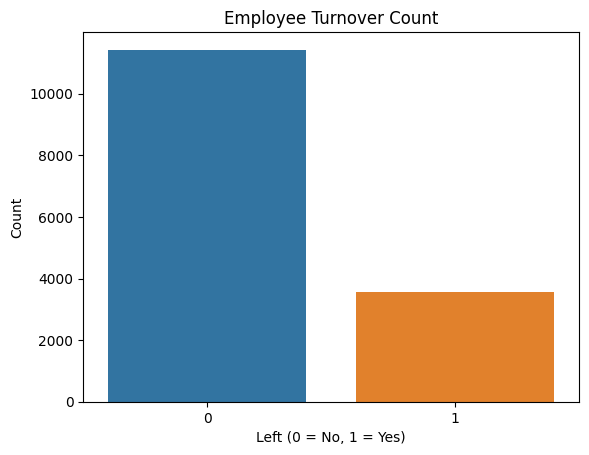

In [9]:
#shows the overall proportion of employees who left versus those who stayed
turnover_rate = hr_data['left'].mean() * 100
print(f"Employee Turnover Rate: {turnover_rate:.2f}%")

# Visualization
sns.countplot(x='left', data=hr_data)
plt.title("Employee Turnover Count")
plt.xlabel("Left (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


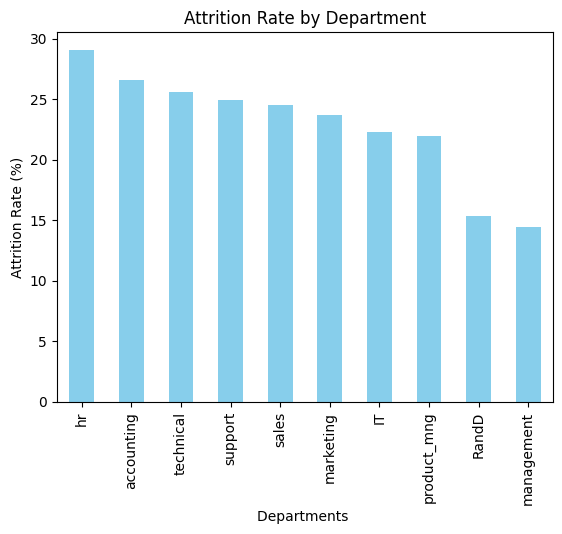

In [19]:
#highlights which departments experience higher turnover
attrition_dept = hr_data.groupby('Departments ')['left'].mean().sort_values(ascending=False) * 100

# Bar plot
attrition_dept.plot(kind='bar', color='skyblue')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate (%)")
plt.show()


Average Tenure: 3.50 years


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


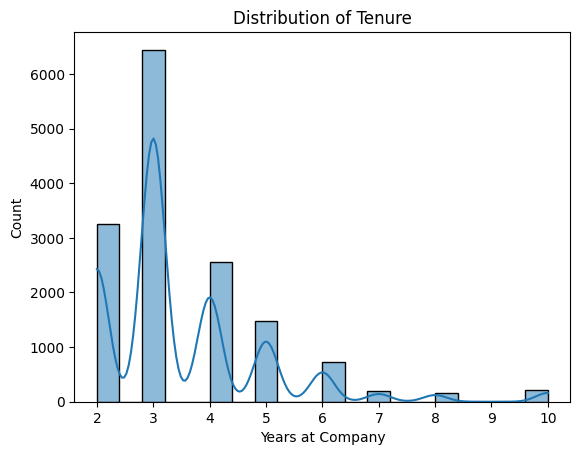

In [11]:
#reveals how long employees typically stay at the company
avg_tenure = hr_data['time_spend_company'].mean()
print(f"Average Tenure: {avg_tenure:.2f} years")
sns.histplot(hr_data['time_spend_company'], bins=20, kde=True)
plt.title("Distribution of Tenure")
plt.xlabel("Years at Company")
plt.show()


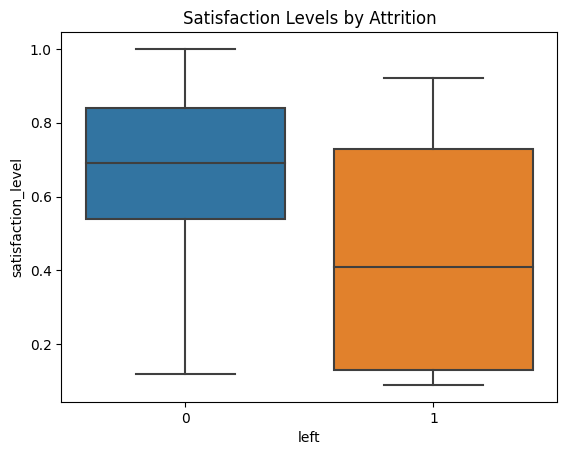

In [12]:
#boxplots illustrate the relationship between job satisfaction
sns.boxplot(x='left', y='satisfaction_level', data=hr_data)
plt.title("Satisfaction Levels by Attrition")
plt.show()


0---> Indicates Employess Who Stayed

1---> Indicates Employees Who Left

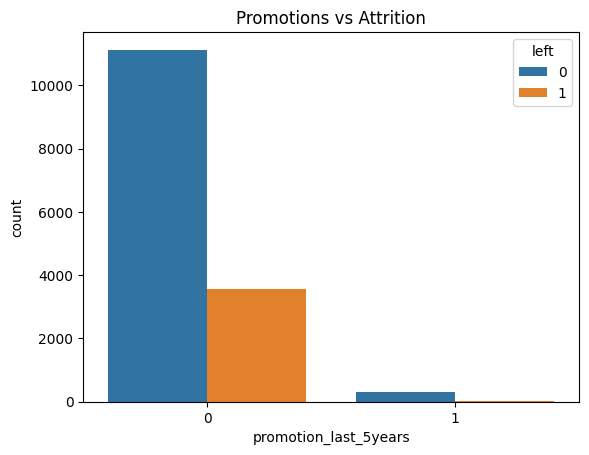

In [13]:
#bar plot illustrate the relationship between promotion and attrition
sns.countplot(x='promotion_last_5years', hue='left', data=hr_data)
plt.title("Promotions vs Attrition")
plt.show()


0---> Indicates Employess Who Stayed

1---> Indicates Employees Who Left

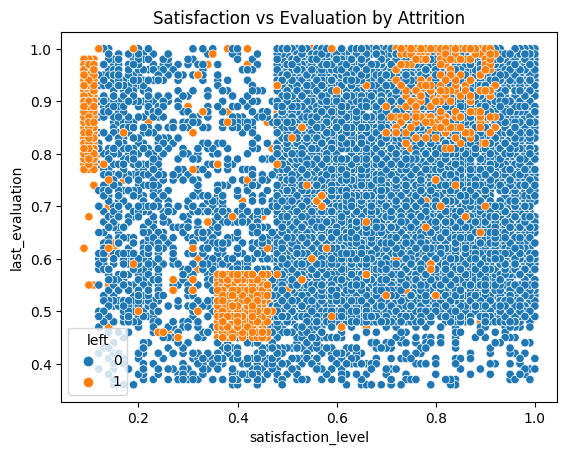

In [14]:
#scatter plot illustrate the relationship between satisfaction ,evaluation and attrition
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=hr_data)
plt.title("Satisfaction vs Evaluation by Attrition")
plt.show()


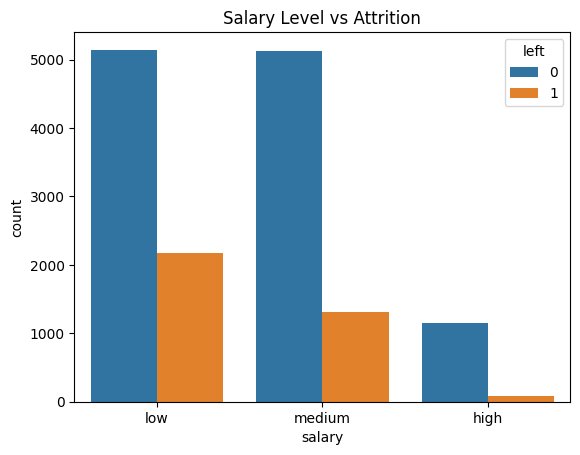

In [15]:
#demonstrates how compensation levels are linked to retention
sns.countplot(x='salary', hue='left', data=hr_data)
plt.title("Salary Level vs Attrition")
plt.show()


0---> Indicates Employess Who Stayed

1---> Indicates Employees Who Left

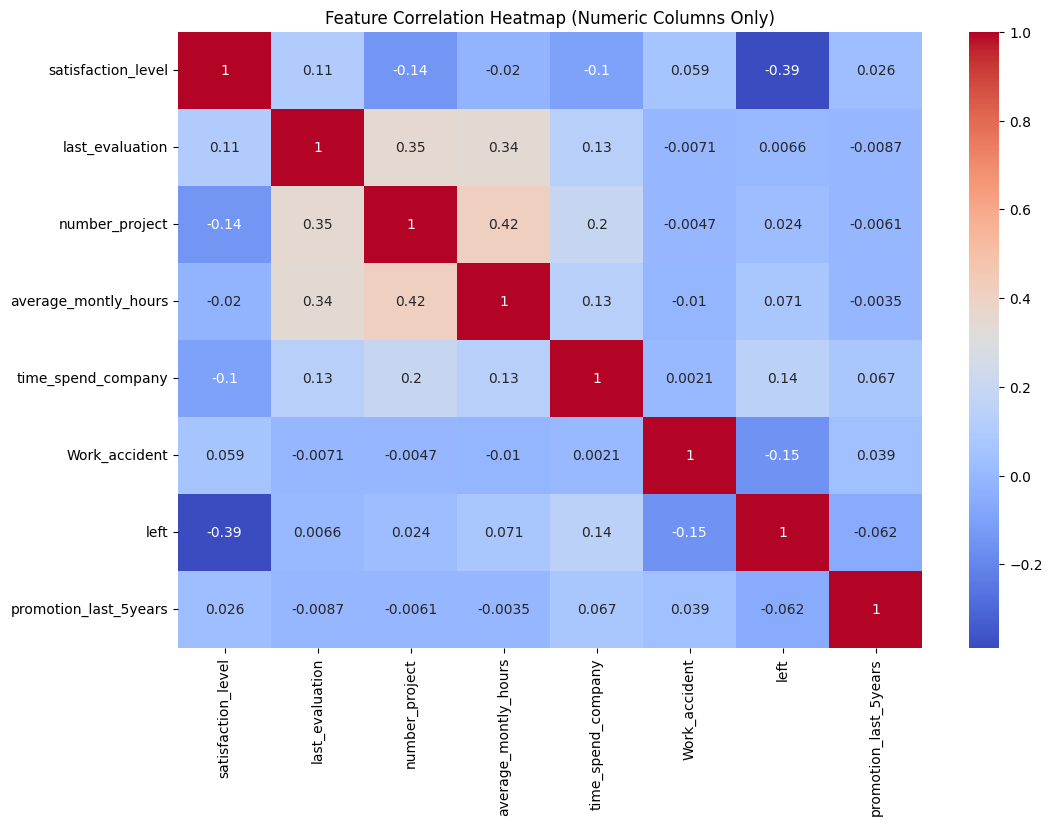

In [16]:
#provides a holistic view of how different features interact
numeric_cols = hr_data.select_dtypes(include='number').columns

plt.figure(figsize=(12,8))
sns.heatmap(hr_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [22]:
#for exploring relationships between variables like satisfaction, evaluation, department, and salary
fig = px.scatter(
    hr_data,
    x='satisfaction_level',
    y='last_evaluation',
    color='left',                     # 0 = stayed, 1 = left
    hover_data=['Departments ', 'salary'], 
    title="Satisfaction vs Evaluation"
)

fig.show()
